# GPA & IQ Data Analysis and Prediction

This notebook covers:
- Data loading and cleaning
- Exploratory data analysis
- Correlation analysis
- Predictive modeling (IQ from GPA)
- Model evaluation

## 1. Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Load data
df = pd.read_csv('gpa_iq.csv')
df.head()

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58


### Data Cleaning
- Remove duplicates
- Drop unnecessary columns (`obs`, `concept`)
- Check for missing values

In [3]:
# Remove duplicates
df = df.drop_duplicates()

# Drop unnecessary columns
df = df.drop(['obs', 'concept'], axis=1)

# Check for missing values
print(df.isnull().sum())
df.describe()

gpa       0
iq        0
gender    0
dtype: int64


,gpa,iq,gender
count,78.000000,78.000000,78.000000
mean,7.446538,108.923077,1.602564
std,2.099557,13.170973,0.492535
min,0.530000,72.000000,1.000000
25%,6.278000,103.000000,1.000000
50%,7.829000,110.000000,2.000000
75%,8.983000,117.500000,2.000000
max,10.760000,136.000000,2.000000


## 2. Exploratory Data Analysis

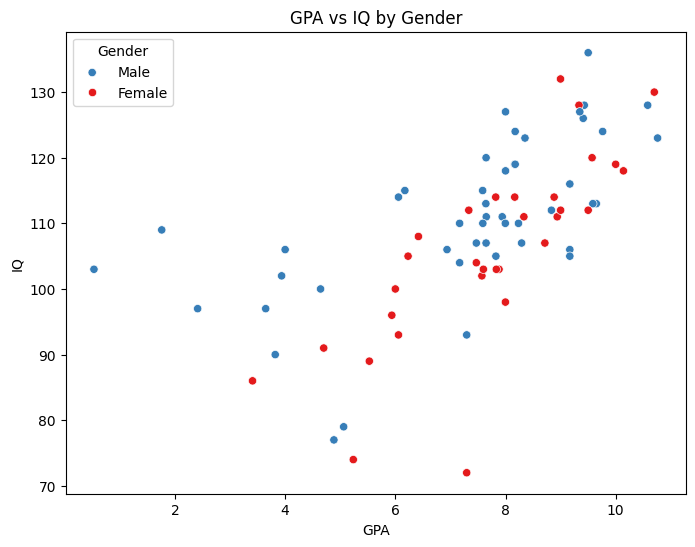

In [4]:
# Visualize GPA vs IQ
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='gpa', y='iq', hue='gender', palette='Set1')
plt.title('GPA vs IQ by Gender')
plt.xlabel('GPA')
plt.ylabel('IQ')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

## 3. Correlation Analysis

In [5]:
# Pearson correlation
corr, p_value = pearsonr(df['gpa'], df['iq'])
print(f'Pearson correlation coefficient: {corr:.3f}')
print(f'P-value: {p_value:.3e}')

Pearson correlation coefficient: 0.634
P-value: 4.737e-10


In [17]:
# Calculate and print Pearson correlation between GPA and IQ for each gender
for gender_value, gender_name in [(1, 'Male'), (2, 'Female')]:
    subset = df[df['gender'] == gender_value]
    corr_gender, p_gender = pearsonr(subset['gpa'], subset['iq'])
    print(f"{gender_name}: Pearson correlation = {corr_gender:.3f}, p-value = {p_gender:.3e}")

Male: Pearson correlation = 0.780, p-value = 2.361e-07
Female: Pearson correlation = 0.630, p-value = 2.074e-06


## 4. Predictive Modeling

We will use 80% of the data for training and 20% for testing.

In [6]:
# Prepare features and target
X = df[['gpa']]
y = df['iq']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training samples: {len(X_train)}, Testing samples: {len(X_test)}')

Training samples: 62, Testing samples: 16


### Linear Regression Model

In [7]:
# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.3f}')

Mean Squared Error: 73.07
R^2 Score: 0.217


#### Plot Predictions

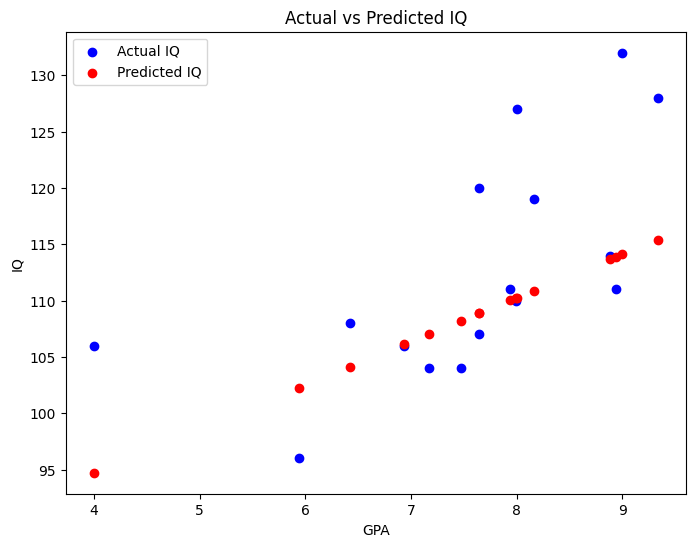

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual IQ')
plt.scatter(X_test, y_pred, color='red', label='Predicted IQ')
plt.xlabel('GPA')
plt.ylabel('IQ')
plt.title('Actual vs Predicted IQ')
plt.legend()
plt.show()

## 5. Alternative Model: Multiple Linear Regression (with Gender)

Let's see if including gender improves prediction.

In [9]:
# One-hot encode gender
X2 = pd.get_dummies(df[['gpa', 'gender']], columns=['gender'], drop_first=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
y2_pred = lr2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
print(f'MSE (with gender): {mse2:.2f}')
print(f'R^2 (with gender): {r2_2:.3f}')

MSE (with gender): 85.59
R^2 (with gender): 0.083


Alternative Model: Actual vs Predicted IQ

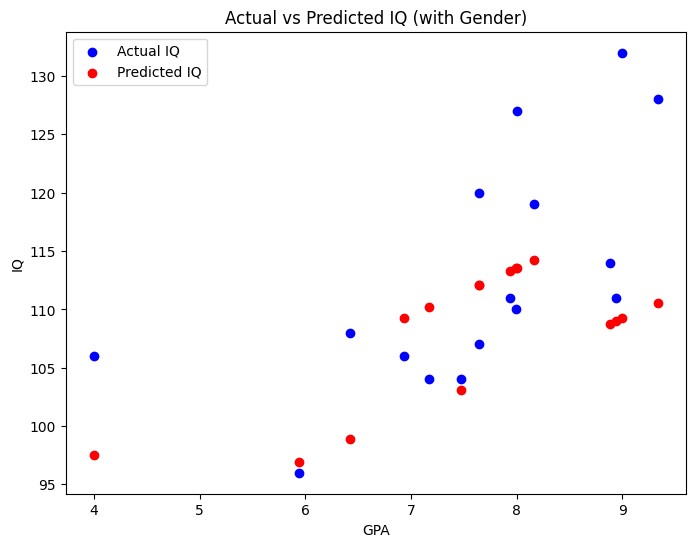

In [12]:
# Visualize predictions for the model with gender
plt.figure(figsize=(8,6))
plt.scatter(X2_test['gpa'], y2_test, color='blue', label='Actual IQ')
plt.scatter(X2_test['gpa'], y2_pred, color='red', label='Predicted IQ')
plt.xlabel('GPA')
plt.ylabel('IQ')
plt.title('Actual vs Predicted IQ (with Gender)')
plt.legend()
plt.show()

Testing both models on accurasy

In [16]:
# For the simple linear regression model
tolerance = 10  # IQ points
accurate_preds = np.abs(y_test - y_pred) <= tolerance
accuracy_percent = 100 * accurate_preds.sum() / len(y_test)
print(f"Simple model: {accuracy_percent:.1f}% of predictions are within ±{tolerance} IQ points of the actual value.")

# For the model with gender
accurate_preds2 = np.abs(y2_test - y2_pred) <= tolerance
accuracy_percent2 = 100 * accurate_preds2.sum() / len(y2_test)
print(f"Model with gender: {accuracy_percent2:.1f}% of predictions are within ±{tolerance} IQ points of the actual value.")

Simple model: 68.8% of predictions are within ±10 IQ points of the actual value.
Model with gender: 81.2% of predictions are within ±10 IQ points of the actual value.


## 6. Conclusions

- **Data cleaning**: Removed duplicates, dropped unnecessary columns, checked for missing values.
- **Correlation**: Pearson correlation coefficient calculated between GPA and IQ.
- **Modeling**: Linear regression used to predict IQ from GPA. Also tried multiple regression with gender.
- **Evaluation**: Overall speaking, the model with gender was more accurate , with a slightly higher R² and lower MSE. The simple model had about 70% of predictions within ±10 IQ points, while the model with gender had about 81%. This accurasy is quite low , this can be reasoned by the low amount of data and related columns. 
- **So what can be said**: In our case gender does not have a significant impact on the correlation between GPA and IQ. Also for males the correlation between gpa and iq 78 percent while for females this figure is 63.
- **Can we make some desicions based on this?**: Short Answer : NO !!! . As this models are trained on a very small dataset and include only 2 factors it is 100% false to make some decisions based on this.
- **What is the purpose of this project?**: This project was made for eductaional purposes.
